In [2]:
import warnings
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from game import Game
from models import Player, Land, MockPlayer
from utils.fc import get_df_over_increase, create_mock_game, simulation, merge_dfs, get_diff, get_df_columns_mean, get_df_columns_sum
from utils.mpl import plot_scatter, plot_line_with_scatter

In [3]:
df = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,group=False)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,hero='dicez', rarity='common', group=False)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,hero='dicez', rarity='uncommon', group=False)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,hero='dicez', rarity='rare', group=False)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,hero='dicez', rarity='epic', group=False)
df = merge_dfs(dfs=[df, df1, df2, df3, df4], column='goldz', pk='day', limits=(20,30))


# COMPARING ATTACKS BETWEEN RARITYS

In [4]:
df

,day,no_hero,common,uncommon,rare,epic
20,11.0,1.65,2.35,2.01,2.38,2.50
21,11.0,1.11,1.91,2.08,2.50,2.65
22,12.0,1.43,1.82,2.04,2.71,2.68
23,12.0,1.62,2.04,2.29,2.65,2.43
24,13.0,1.43,2.15,2.34,2.79,2.51
25,13.0,1.32,1.78,2.27,2.43,2.52
26,14.0,1.71,2.00,1.98,2.44,2.34
27,14.0,1.58,2.10,2.23,2.17,2.85
28,15.0,1.50,2.17,1.95,2.46,2.84
29,15.0,1.62,1.83,2.22,2.02,2.69


# TOTAL GOLDZ AFTER 10 ATTACKS

In [4]:
df_sum = get_df_columns_sum(df, ['no_hero','common', 'uncommon', 'rare', 'epic'])
df_sum

,no_hero,common,uncommon,rare,epic
0,14.59,20.09,22.36,25.05,27.04


Text(0.5, 1.0, 'Total Goldz After 5 Days')

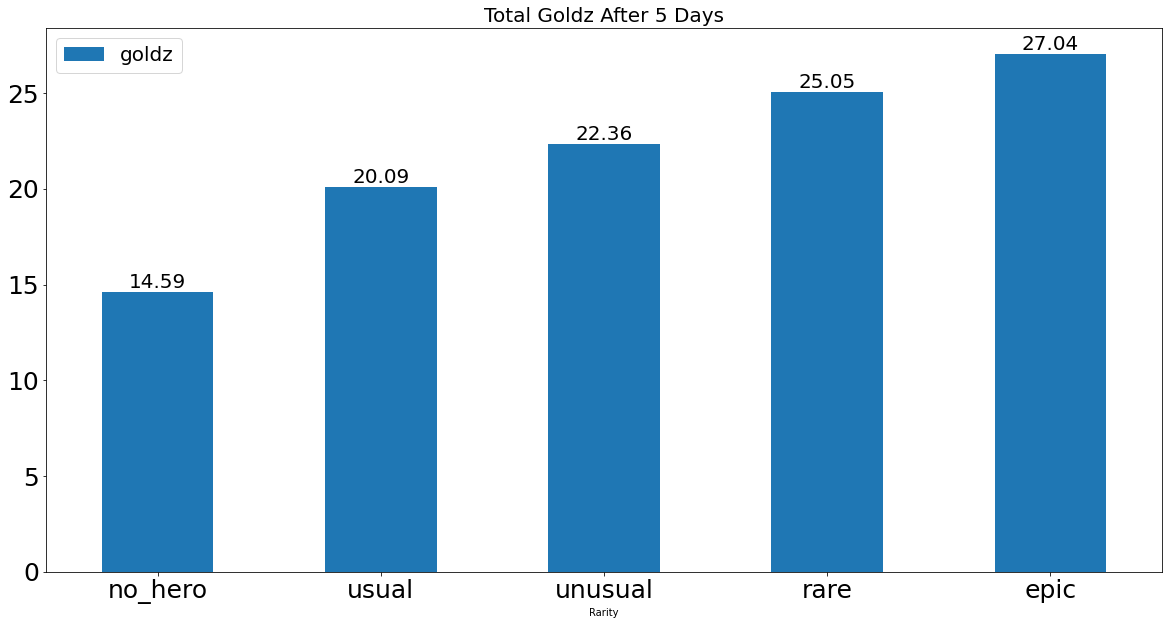

In [5]:
df_sum = pd.DataFrame({'heroes':df_sum.columns, 'goldz':df_sum.iloc[0].to_list()})

ax = df_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Total Goldz After 5 Days", fontsize=20)

# GOLDZ AVERAGE ON EACH ATTACK

In [6]:
df_mean = get_df_columns_mean(df, ['no_hero','common', 'uncommon', 'rare', 'epic'])
df_mean

,no_hero,common,uncommon,rare,epic
0,1.459,2.009,2.236,2.505,2.704


Text(0.5, 1.0, 'Goldz Average on Each attack')

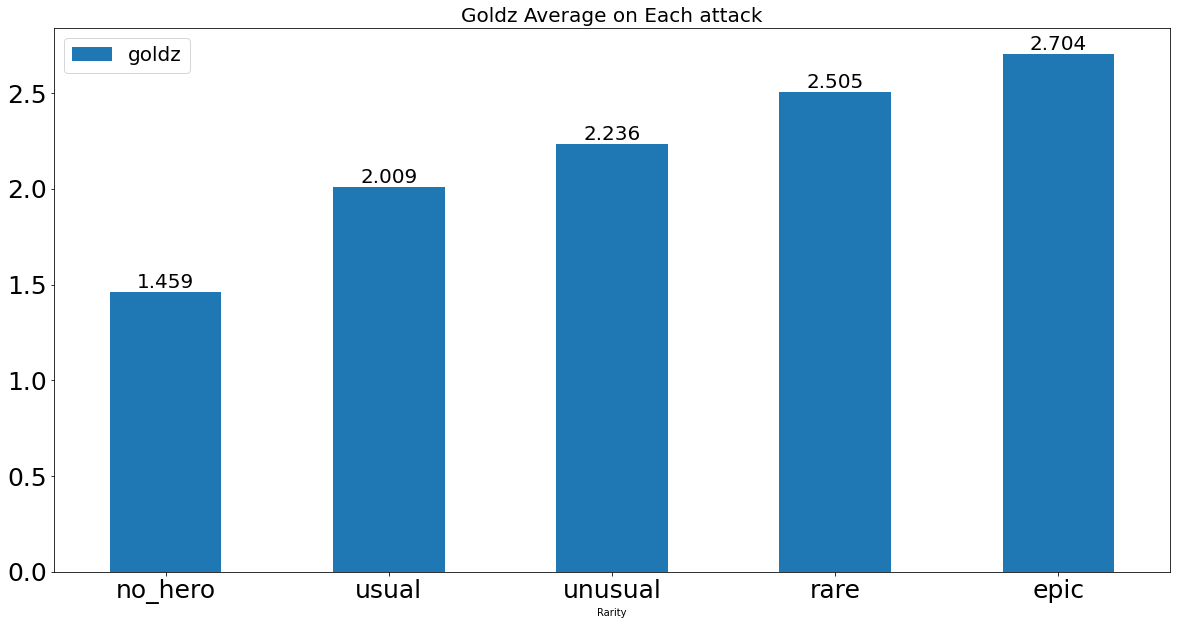

In [7]:

df_mean = pd.DataFrame({'heroes':df_mean.columns, 'goldz':df_mean.iloc[0].to_list()})

ax = df_mean.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Goldz Average on Each attack", fontsize=20)

# GOLDZ DIFFERENCE COMPARED TO NO HERO

In [8]:
df = get_diff(df=df)
df

,day,common,uncommon,rare,epic
20,11.0,0.66,0.68,1.43,1.33
21,11.0,0.75,0.76,0.90,1.39
22,12.0,0.99,1.35,1.35,1.41
23,12.0,0.54,0.58,1.04,0.98
24,13.0,0.46,0.79,0.67,1.24
25,13.0,0.28,0.78,0.85,1.18
26,14.0,0.32,0.70,1.26,0.89
27,14.0,0.06,0.53,0.68,1.17
28,15.0,0.61,0.57,0.86,1.43
29,15.0,0.83,1.03,1.42,1.43


# TOTAL GOLDZ EARNED COMPARED TO NO HERO

In [9]:
df_diff_sum = get_df_columns_sum(df, ['common', 'uncommon', 'rare', 'epic'])
df_diff_sum

,common,uncommon,rare,epic
0,5.5,7.77,10.46,12.45


Text(0.5, 1.0, 'Total Diff Goldz Compared to No Hero')

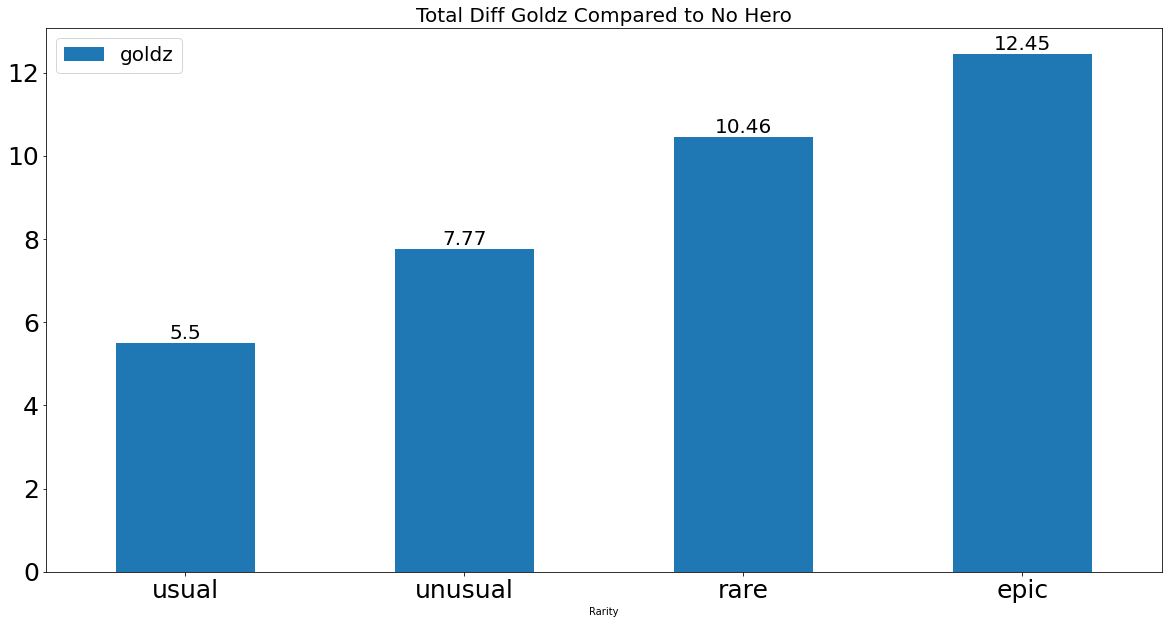

In [10]:
df_diff_sum = pd.DataFrame({'heroes':df_diff_sum.columns, 'goldz':df_diff_sum.iloc[0].to_list()})

ax = df_diff_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Total Diff Goldz Compared to No Hero", fontsize=20)

# GOLDZ DIFFERENCE EARNED PER ATTACK COMPARED TO NO HERO


In [11]:
df_diff_mean = get_df_columns_mean(df, ['common', 'uncommon', 'rare', 'epic'])
df_diff_mean

,common,uncommon,rare,epic
0,0.55,0.777,1.046,1.245


Text(0.5, 1.0, 'Diff Goldz Average per Attack')

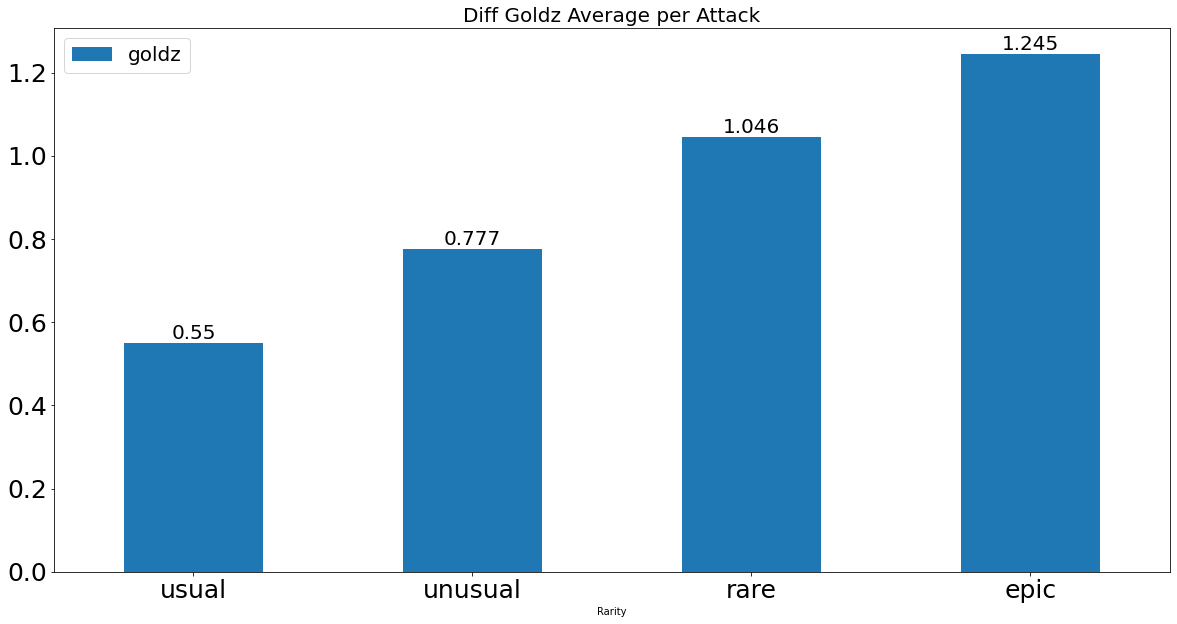

In [12]:
df_diff_mean = pd.DataFrame({'heroes':df_diff_mean.columns, 'goldz':df_diff_mean.iloc[0].to_list()})

ax = df_diff_mean.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Diff Goldz Average per Attack", fontsize=20)